In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import numpy as np
import h5py as h5
import sys
import matplotlib.pyplot as plt

sys.path.append('/reg/neh/home5/haoyuan/Documents/my_repos/Arsenal')
import arsenal

# Load radial distributions

In [3]:
with h5.File('/reg/d/psdm/amo/amox34117/results/haoyuan/radial_distribution_and_intensity_run_176_all_2018_09_21_10_51_11.h5','r') as h5file:
    radial_mean = np.array(h5file['/radial_mean'])
    cat_list = np.array(h5file['/category_list'])
    average_radial_mean = np.array(h5file['average_radial_mean'])

# Show example distributions

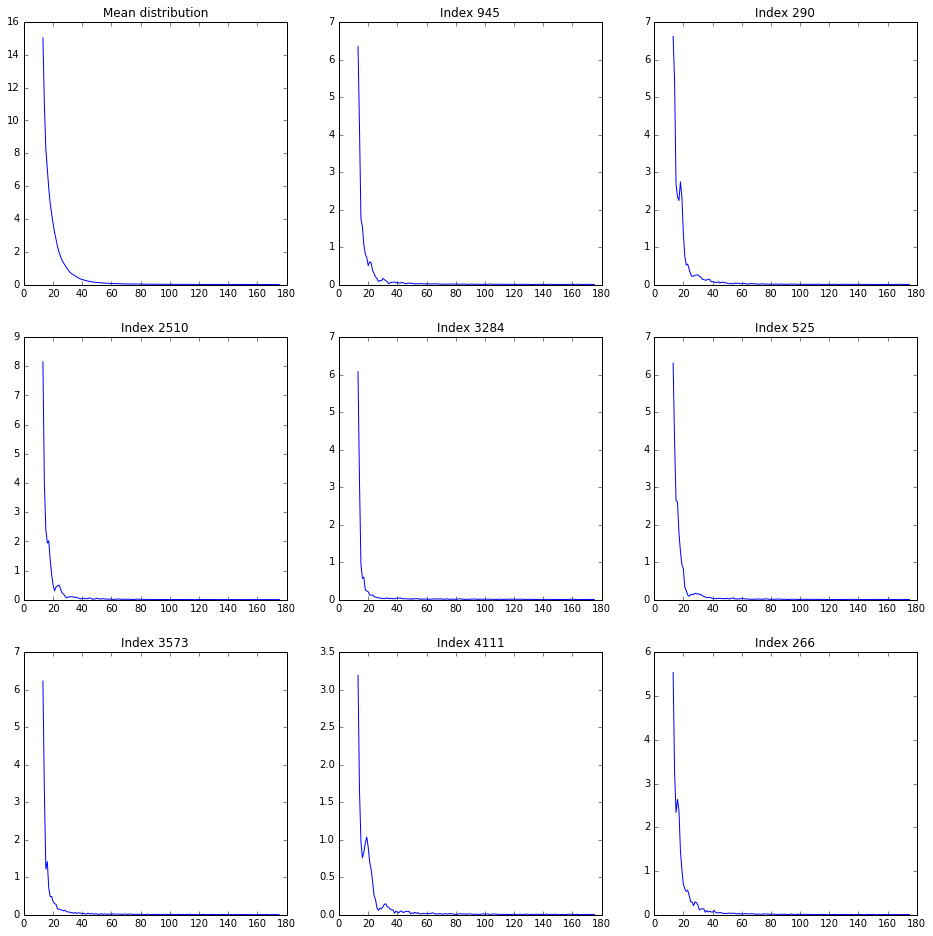

In [4]:
# Set up the canvas
fig, axes = plt.subplots(nrows=3, ncols=3)
fig.set_figheight(16)
fig.set_figwidth(16)

# Show the average pattern
axes[0,0].plot(cat_list, average_radial_mean)
axes[0,0].set_title("Mean distribution")

# Generate plot list 
index_list = [[l,m] for l in range(3) for m in range(3)]
index_list.remove([0,0])

# randomly get 8 samples
pattern_idx = np.random.permutation(radial_mean.shape[0])[:8]

# Plot the patterns
for l in range(8):
    axes[index_list[l][0], index_list[l][1]].plot(cat_list, radial_mean[pattern_idx[l]])
    axes[index_list[l][0], index_list[l][1]].set_title("Index {}".format(pattern_idx[l]))
    
# Show the canvas
plt.show()

# Apply scaling

In [11]:
# Get scaling factor
scaling_factor = np.power( cat_list, 0.)

# Apply the scaling factor
distri_scaled = distributions * scaling_factor[np.newaxis, :]

# Scaled mean distribution
mean_distri_scaled = mean_distribution * scaling_factor

# Show the scaling quality

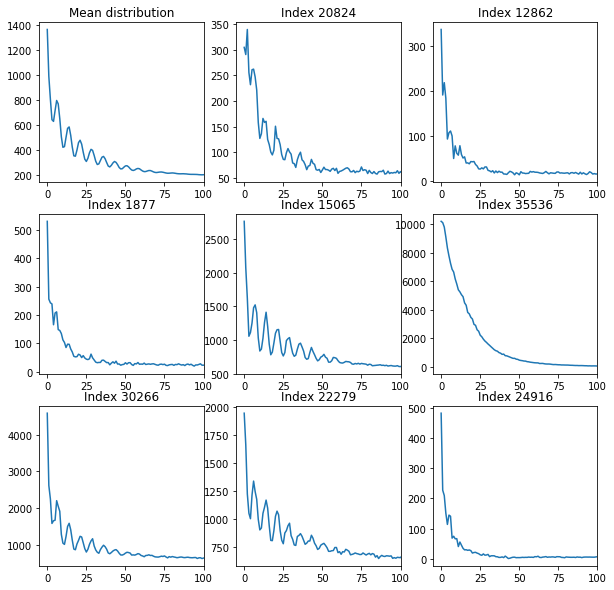

In [12]:
x_axis = np.arange(cat_list.shape[0])
x_range = [-5, 100]

# Set up the canvas
fig, axes = plt.subplots(nrows=3, ncols=3)
fig.set_figheight(10)
fig.set_figwidth(10)

# Show the average pattern
axes[0,0].plot(x_axis, mean_distri_scaled)
axes[0,0].set_title("Mean distribution")
axes[0,0].set_xlim(x_range)

# Generate plot list 
index_list = [[l,m] for l in range(3) for m in range(3)]
index_list.remove([0,0])

# randomly get 8 samples
pattern_idx = np.random.permutation(distributions.shape[0])[:8]

# Plot the patterns
for l in range(8):
    axes[index_list[l][0], index_list[l][1]].plot(x_axis, distri_scaled[pattern_idx[l]])
    axes[index_list[l][0], index_list[l][1]].set_title("Index {}".format(pattern_idx[l]))
    axes[index_list[l][0], index_list[l][1]].set_xlim(x_range)

# Show the canvas
plt.show()